In [2]:
%matplotlib inline
from os import listdir
from os.path import isfile, join
import numpy as np
from glob import glob
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
import statsmodels.stats.multitest as smt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from matplotlib.colors import DivergingNorm
from collections import Counter

/Users/osipova/local/Homebrew/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


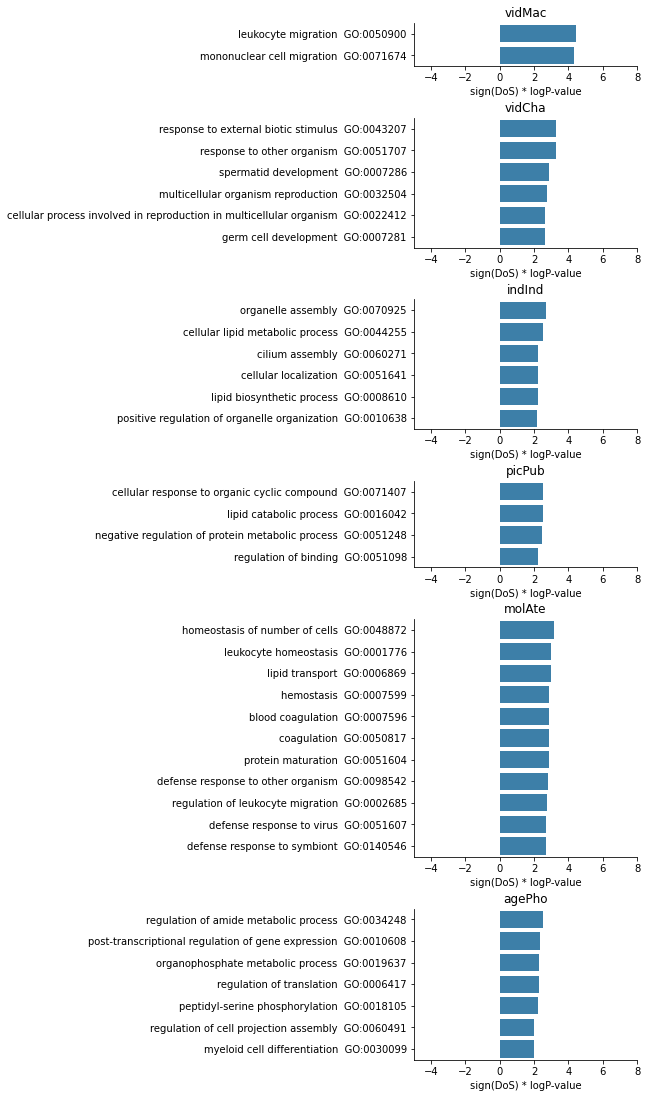

In [2]:
## GSEA from clusterProfiler
dir_path = '/Users/osipova/Documents/LabDocs/Brood_parasites_analysis/'
# dbs = ['vidMac', 'vidCha', 'anoImb', 'molAte', 'agePho', 'picPub']
dbs = ['anoImb', 'vidMac', 'vidCha', 'indInd', 'picPub', 'molAte', 'agePho', 'taeGut', 'poeAcu']

## Load data
DF_dbs = {}
for db in dbs:
    file_name = 'MK_test_{}_ncbi/impMKT/gse.tsv'.format(db)
    file_data = glob(dir_path + file_name)[0]
    df = pd.read_csv(file_data, sep='\t')

    df['GOfull'] = df['Description'] + '  ' + df['ID']
    df['logpval'] = - np.log10(df['pvalue'])
    dos = [1 if x > 0 else -1 for x in df['NES']]
    df['dos'] = dos
    df['sign_logP'] = df['logpval'] * dos
    df.sort_values(by=['sign_logP'], inplace=True, ascending=False)
    DF_dbs[db] = df


## Plot barplots p-value DoS > 0 and DoS < 0
db_ratios = [DF_dbs[db].shape[0] for db in dbs]

fig, axes = plt.subplots(len(dbs), 1, gridspec_kw={'height_ratios': db_ratios}, figsize=(4, 4*len(dbs)))

i = 0
for db in dbs:
    axi = axes[i]
    sns.set_palette(['#2b83ba', '#d7191c'])
    df = DF_dbs[db]
    sns.barplot(ax=axi, data=df, x='sign_logP', y='GOfull', hue='dos', dodge=False)
    axi.set_xlim(-5, 8)
    axi.set(xlabel='sign(DoS) * logP-value', ylabel='')
    axi.legend([], [], frameon=False)
    axi.set_title(db)
    i += 1
    
sns.despine(fig=None, ax=None, left=False, bottom=False, offset=None, trim=False)
fig.subplots_adjust(bottom=0, top=0.6, wspace=0, hspace=0.4)
fig.tight_layout()  

pdf_name = 'gsea_top_terms.{}clades.clusterProfiler.pdf'.format(len(dbs))
# fig.savefig(pdf_name, bbox_inches='tight')